In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [71]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import tensorflow as tf 

from sklearn.preprocessing import LabelEncoder

In [72]:
df = pd.read_csv('../kdt4/workplace2/data/deep_data_files-20220321T014240Z-001/deep_data_files/fish.csv')
df.head()

Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

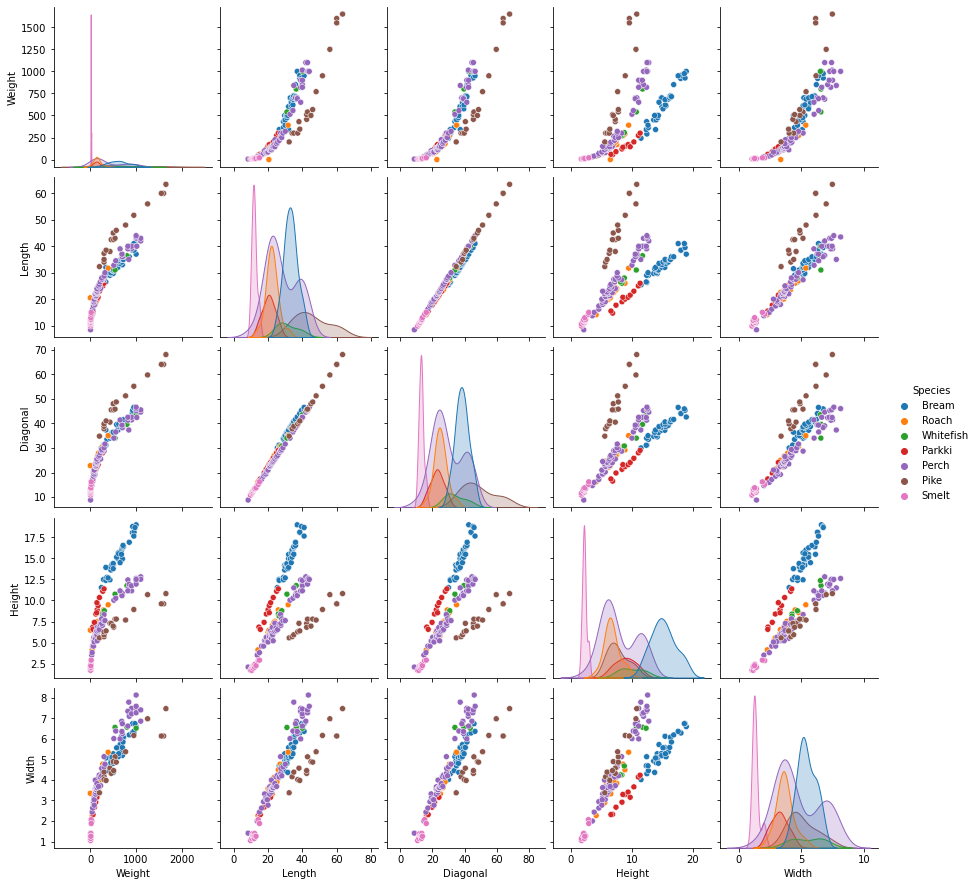

In [73]:
sns.pairplot(df,hue='Species')

In [75]:
y = df.Species # y가 문자열로되어있음
x = df.drop('Species',axis=1)

In [80]:
df.Species.value_counts() # 멀티클래시피케이션

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [81]:
y

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [82]:
x

Weight  Length  Diagonal   Height   Width
0     242.0    25.4      30.0  11.5200  4.0200
1     290.0    26.3      31.2  12.4800  4.3056
2     340.0    26.5      31.1  12.3778  4.6961
3     363.0    29.0      33.5  12.7300  4.4555
4     430.0    29.0      34.0  12.4440  5.1340
..      ...     ...       ...      ...     ...
154    12.2    12.2      13.4   2.0904  1.3936
155    13.4    12.4      13.5   2.4300  1.2690
156    12.2    13.0      13.8   2.2770  1.2558
157    19.7    14.3      15.2   2.8728  2.0672
158    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 5 columns]

In [106]:
e = LabelEncoder() #멀티라 숫자로바꿔주고
y_en = e.fit_transform(y)
y_en.shape

(159,)

In [84]:
y_oh = tf.keras.utils.to_categorical(y_en) #원핫으로 바꿔서해도되고 그냥 라벨로 할때 코스트를 sparse로 잡아도됨
y_oh


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_sc = scaler.fit_transform(x)
x_sc

array([[1.46666667e-01, 3.09090909e-01, 3.58108108e-01, 5.68334049e-01,
        4.18978349e-01],
       [1.75757576e-01, 3.25454545e-01, 3.78378378e-01, 6.24055350e-01,
        4.59235453e-01],
       [2.06060606e-01, 3.29090909e-01, 3.76689189e-01, 6.18123353e-01,
        5.14278868e-01],
       [2.20000000e-01, 3.74545455e-01, 4.17229730e-01, 6.38566105e-01,
        4.80364795e-01],
       [2.60606061e-01, 3.74545455e-01, 4.25675676e-01, 6.21965801e-01,
        5.76003608e-01],
       [2.72727273e-01, 3.87272727e-01, 4.37500000e-01, 6.89202837e-01,
        5.46882048e-01],
       [3.03030303e-01, 3.87272727e-01, 4.34121622e-01, 7.22699465e-01,
        5.96371786e-01],
       [2.36363636e-01, 3.92727273e-01, 4.42567568e-01, 6.35083524e-01,
        5.13419035e-01],
       [2.72727273e-01, 3.92727273e-01, 4.44256757e-01, 7.12565153e-01,
        5.35098106e-01],
       [3.03030303e-01, 4.05454545e-01, 4.62837838e-01, 7.25433291e-01,
        5.51392648e-01],
       [2.87878788e-01, 4.1090

In [86]:
x_sc.shape #5차원데이터

(159, 5)

In [95]:
model = Sequential()
model.add(Dense(128, input_dim=5,activation='relu'))
model.add(Dense(64,activation='relu')) #히든
model.add(Dense(32,activation='relu')) # 히든
model.add(Dense(7,activation='softmax')) #아웃풋은 7개의값을 갖고있기때문에 출력엔 노드7개를 줌 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               768       
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 7)                 231       
                                                                 
Total params: 11,335
Trainable params: 11,335
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam') #멀티클래시피케이션은 카테고리칼쓰면됨

In [104]:
hist = model.fit(x_sc,y_oh,epochs=100,batch_size=1) # 매 데이터마다 바로바로 업데이트 (백프로퍼게이션)하도록함 batchsize

Epoch 1/100
159/159 [==============================] - 0s 1ms/step - loss: 2.3758 - accuracy: 0.6415
Epoch 2/100
159/159 [==============================] - 0s 1ms/step - loss: 1.0200 - accuracy: 0.6792
Epoch 3/100
159/159 [==============================] - 0s 1ms/step - loss: 0.7635 - accuracy: 0.7044
Epoch 4/100
159/159 [==============================] - 0s 1ms/step - loss: 0.6022 - accuracy: 0.7799
Epoch 5/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.8176
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8994
Epoch 7/100
159/159 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8365
Epoch 8/100
159/159 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8805
Epoch 9/100
159/159 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8742
Epoch 10/100
159/159 [==============================] - 0s 1ms/step - loss: 0.2826 - accura

159/159 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9057
Epoch 82/100
159/159 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.8868
Epoch 83/100
159/159 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9119
Epoch 84/100
159/159 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.8994
Epoch 85/100
159/159 [==============================] - 0s 1ms/step - loss: 0.2186 - accuracy: 0.8868
Epoch 86/100
159/159 [==============================] - 0s 1ms/step - loss: 0.2055 - accuracy: 0.8931
Epoch 87/100
159/159 [==============================] - 0s 1ms/step - loss: 0.1941 - accuracy: 0.9119
Epoch 88/100
159/159 [==============================] - 0s 1ms/step - loss: 0.2006 - accuracy: 0.8994
Epoch 89/100
159/159 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.8994
Epoch 90/100
159/159 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 

In [107]:
model.evaluate(x_sc,y_oh)

5/5 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9057


[0.18167701363563538, 0.9056603908538818]

In [108]:
model.predict(x_sc).argmax(axis=1)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 6, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5], dtype=int64)